In [6]:
import numpy as np
import pandas as pd


In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
wine = pd.read_csv('/content/drive/MyDrive/wine/wine.csv', encoding = "ISO-8859-1")

In [10]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 VulkÃ Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwineÂ,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwineÂ,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           79191 non-null   object 
 1   country             103283 non-null  object 
 2   review_title        103322 non-null  object 
 3   review_description  103322 non-null  object 
 4   designation         73686 non-null   object 
 5   points              103322 non-null  int64  
 6   price               96359 non-null   float64
 7   province            103283 non-null  object 
 8   region_1            87254 non-null   object 
 9   region_2            44863 non-null   object 
 10  winery              103322 non-null  object 
 11  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [12]:
wine.shape

(103322, 12)

In [13]:
wine.isnull().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [14]:
wine.drop_duplicates(inplace=True)

In [15]:
wine.shape

(95455, 12)

In [16]:
wine[['country','review_title','review_description','points','price','variety']]

,country,review_title,review_description,points,price,variety
0,Italy,Nicosia 2013 VulkÃ Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir
...,...,...,...,...,...,...
103317,Germany,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef) 2013...,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling
103318,US,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir
103319,France,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,90,30.0,GewÃ¼rztraminer
103320,France,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris


In [17]:
wine.describe()

,points,price
count,95455.000000,88941.000000
mean,88.538851,37.066527
std,3.144450,44.023577
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


**Here we are using read_csv() to read our CSV file. Dropping Rows with at least 1 null value. A data frame is read and all rows with any Null values are dropped. The size of old and new data frames is compared to see how many rows had at least 1 Null value. **

In [18]:
wine.dropna().describe()

,points,price
count,18202.000000,18202.000000
mean,89.618119,42.774256
std,2.882214,31.157153
min,80.000000,4.000000
25%,88.000000,25.000000
50%,90.000000,38.000000
75%,92.000000,52.000000
max,100.000000,2013.000000


In [19]:
wine.groupby('country').mean()

<ipython-input-19-9b56f0d2905e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wine.groupby('country').mean()


,points,price
country,,
Argentina,86.754186,25.337971
Armenia,88.000000,15.000000
Australia,87.943163,29.231544
Austria,90.340930,31.862480
Brazil,84.777778,26.031250
Bulgaria,88.018349,15.201835
Canada,89.275676,33.896175
Chile,86.430842,20.740542
Croatia,86.000000,23.928571


In [20]:
wine['country'].value_counts()

US                44574
France            18368
Italy             10485
Portugal           3730
Chile              3398
Spain              3157
Argentina          2986
Austria            2194
Germany            1792
New Zealand        1259
Australia          1214
South Africa        842
Israel              368
Canada              185
Greece              182
Bulgaria            109
Romania              84
England              63
Mexico               53
Slovenia             52
Hungary              42
Moldova              41
Brazil               36
Uruguay              35
Turkey               33
Lebanon              30
Morocco              20
Croatia              16
Georgia              15
Peru                 12
Ukraine              12
Cyprus                7
Macedonia             5
Czech Republic        4
Luxembourg            4
Switzerland           4
Serbia                4
India                 2
Slovakia              1
Armenia               1
Name: country, dtype: int64

In [21]:
#wine[(wine['price'] >= 10) and (wine['points'] >= 90)]
wine[(wine['price'] >= 10) &  (wine['points'] >= 90)]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
90,NaN,France,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Medium-gold in color. Complex and inviting nos...,Schoenenbourg Grand Cru Vendanges Tardives,92,80.0,Alsace,Alsace,NaN,Dopff & Irion,Riesling
91,NaN,Italy,Ceretto 2003 Bricco Rocche PrapÃ³ (Barolo),"Slightly backward, particularly given the vint...",Bricco Rocche PrapÃ³,92,70.0,Piedmont,Barolo,NaN,Ceretto,Nebbiolo
92,NaN,US,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,The vineyard is one of the better Chardonnay s...,Stuhlmuller Vineyard,92,36.0,California,Alexander Valley,Sonoma,Matrix,Chardonnay
93,NaN,US,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Defines Rockpile Zinfandel in intensity of fru...,Rockpile Cemetary Vineyard,92,39.0,California,Rockpile,Sonoma,Mauritson,Zinfandel
94,NaN,US,Silverado 2006 Cabernet Sauvignon (Napa Valley),This sophisticated wine is mostly Cabernet Sau...,NaN,92,45.0,California,Napa Valley,Napa,Silverado,Cabernet Sauvignon
...,...,...,...,...,...,...,...,...,...,...,...,...
103317,NaN,Germany,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef) 2013...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr SpÃ¤tlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef),Riesling
103318,@paulgwineÂ,US,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation,Pinot Noir
103319,@vossroger,France,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser,GewÃ¼rztraminer
103320,@vossroger,France,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss,Pinot Gris


In [22]:
#wine[(wine['price'] >= 10) and (wine['points'] >= 90)]
[wine[(wine['price'] >= 10) &  (wine['points'] >= 90)]]

[           user_name  country  \
 90               NaN   France   
 91               NaN    Italy   
 92               NaN       US   
 93               NaN       US   
 94               NaN       US   
 ...              ...      ...   
 103317           NaN  Germany   
 103318  @paulgwineÂ        US   
 103319    @vossroger   France   
 103320    @vossroger   France   
 103321    @vossroger   France   
 
                                              review_title  \
 90      Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...   
 91            Ceretto 2003 Bricco Rocche PrapÃ³  (Barolo)   
 92      Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...   
 93      Mauritson 2007 Rockpile Cemetary Vineyard Zinf...   
 94        Silverado 2006 Cabernet Sauvignon (Napa Valley)   
 ...                                                   ...   
 103317  Dr. H. Thanisch (Erben MÃ¼ller-Burggraef) 2013...   
 103318                  Citation 2004 Pinot Noir (Oregon)   
 103319  Domaine Gresser 2013 Kr

In [23]:
wine['country'].unique()

array(['Italy', 'Portugal', 'US', 'France', 'Germany', 'Argentina',
       'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand',
       'Israel', 'Spain', 'Romania', 'Greece', 'Mexico', 'Hungary',
       'Slovenia', nan, 'Luxembourg', 'England', 'Uruguay', 'Lebanon',
       'Canada', 'Brazil', 'Morocco', 'Czech Republic', 'Bulgaria',
       'Cyprus', 'Turkey', 'Moldova', 'Croatia', 'Peru', 'Georgia',
       'Ukraine', 'Switzerland', 'Slovakia', 'Serbia', 'India',
       'Macedonia', 'Armenia'], dtype=object)

In [24]:
len(wine['variety'].unique())

28

In [25]:
wine['variety'].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'GewÃ¼rztraminer', 'Cabernet Sauvignon',
       'Chardonnay', 'Malbec', 'Red Blend', 'Merlot', 'Gamay',
       'Sauvignon Blanc', 'Bordeaux-style White Blend', 'Sangiovese',
       'Cabernet Franc', 'Champagne Blend', 'Bordeaux-style Red Blend',
       'RosÃ©', 'Zinfandel', 'GrÃ¼ner Veltliner', 'Syrah', 'Nebbiolo',
       'RhÃ´ne-style Red Blend', 'Portuguese White', 'Sparkling Blend',
       'Pinot Grigio', 'Tempranillo'], dtype=object)

In [26]:
variety_dict = {
    'White Blend':0,
    'Portuguese Red':1,
    'Pinot Gris':2,
    'Riesling':3,
    'Pinot Noir':4,
    'GewÃ¼rztraminer':5,
    'Cabernet Sauvignon':6,
    'Chardonnay':7,
    'Malbec':8,
    'Red Blend':9,
    'Merlot':10,
    'Gamay':11,
    'Sauvignon Blanc':12,
    'Bordeaux-style White Blend' :13,
    'Sangiovese':14,
    'Cabernet Franc':15,
    'Champagne Blend':16,
    'Bordeaux-style Red Blend':17,
    'RosÃ©':18,
    'Zinfandel':19,
    'GrÃ¼ner Veltliner':20,
    'Syrah':21,
    'Nebbiolo':22,
    'RhÃ´ne-style Red Blend':23,
    'Portuguese White':24,
    'Sparkling Blend':25,
    'Pinot Grigio':26,
    'Tempranillo':27

}

In [27]:
wine['variety_no']= wine['variety'].map(variety_dict)

In [28]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,variety_no
0,@kerinokeefe,Italy,Nicosia 2013 VulkÃ Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend,0
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red,1
2,@paulgwineÂ,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris,2
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling,3
4,@paulgwineÂ,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir,4


In [29]:
wine[wine['variety_no']==0][['points','price']].head()

,points,price
0,87,NaN
17,87,19.0
20,87,13.0
24,86,NaN
78,87,14.0


In [30]:
wine.groupby('country').mean()

<ipython-input-30-9b56f0d2905e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wine.groupby('country').mean()


,points,price,variety_no
country,,,
Argentina,86.754186,25.337971,8.731748
Armenia,88.000000,15.000000,18.000000
Australia,87.943163,29.231544,8.048600
Austria,90.340930,31.862480,13.190520
Brazil,84.777778,26.031250,13.416667
Bulgaria,88.018349,15.201835,8.678899
Canada,89.275676,33.896175,8.135135
Chile,86.430842,20.740542,9.301059
Croatia,86.000000,23.928571,7.812500


In [31]:
import matplotlib.pyplot as plt

<Axes: xlabel='points', ylabel='Count'>

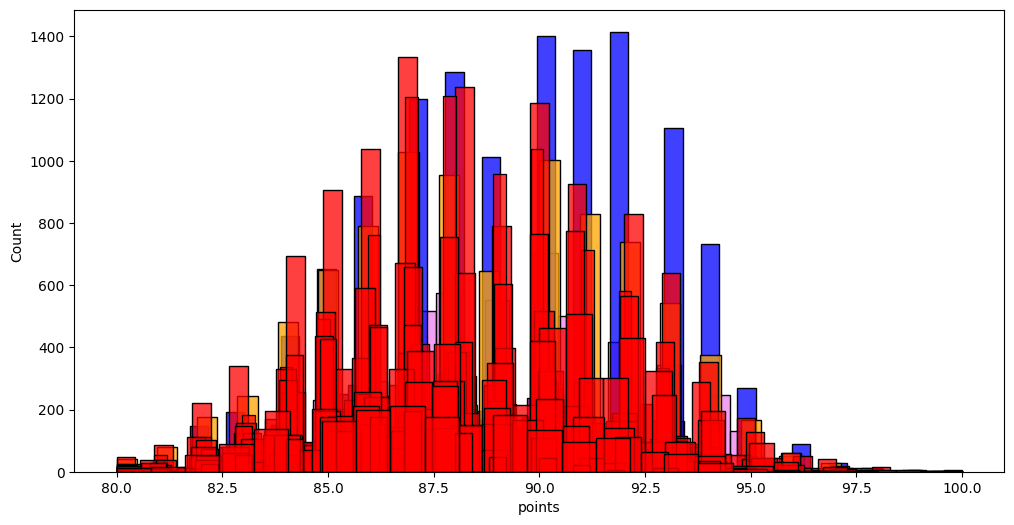

In [32]:
import seaborn as sen 
plt.figure(figsize=(12,6))
sen.histplot(wine[wine['variety_no']==0]['points'],color='purple')
sen.histplot(wine[wine['variety_no']==1]['points'],color='red')
sen.histplot(wine[wine['variety_no']==2]['points'],color='green')
sen.histplot(wine[wine['variety_no']==3]['points'],color='violet')
sen.histplot(wine[wine['variety_no']==4]['points'],color='blue')
sen.histplot(wine[wine['variety_no']==5]['points'],color='black')
sen.histplot(wine[wine['variety_no']==6]['points'],color='orange')
sen.histplot(wine[wine['variety_no']==7]['points'],color='red')
sen.histplot(wine[wine['variety_no']==8]['points'],color='red')
sen.histplot(wine[wine['variety_no']==9]['points'],color='red')
sen.histplot(wine[wine['variety_no']==10]['points'],color='red')
sen.histplot(wine[wine['variety_no']==11]['points'],color='red')
sen.histplot(wine[wine['variety_no']==12]['points'],color='red')
sen.histplot(wine[wine['variety_no']==13]['points'],color='red')
sen.histplot(wine[wine['variety_no']==14]['points'],color='red')
sen.histplot(wine[wine['variety_no']==15]['points'],color='red')
sen.histplot(wine[wine['variety_no']==16]['points'],color='red')
sen.histplot(wine[wine['variety_no']==17]['points'],color='red')
sen.histplot(wine[wine['variety_no']==18]['points'],color='red')
sen.histplot(wine[wine['variety_no']==19]['points'],color='red')
sen.histplot(wine[wine['variety_no']==20]['points'],color='red')
sen.histplot(wine[wine['variety_no']==21]['points'],color='red')
sen.histplot(wine[wine['variety_no']==22]['points'],color='red')
sen.histplot(wine[wine['variety_no']==23]['points'],color='red')
sen.histplot(wine[wine['variety_no']==24]['points'],color='red')
sen.histplot(wine[wine['variety_no']==25]['points'],color='red')
sen.histplot(wine[wine['variety_no']==26]['points'],color='red')
sen.histplot(wine[wine['variety_no']==27]['points'],color='red')




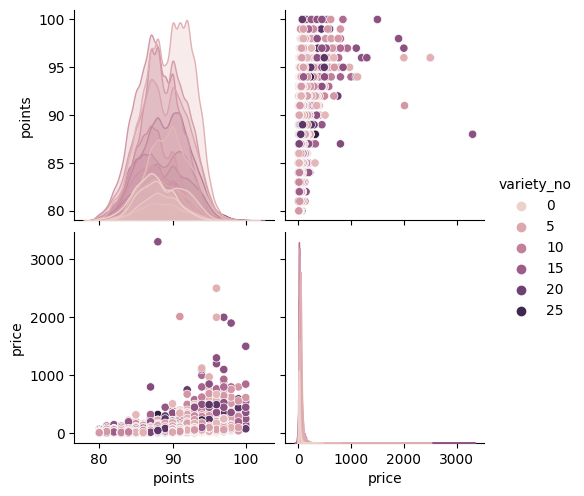

In [33]:
sen.pairplot(wine,hue='variety_no',)

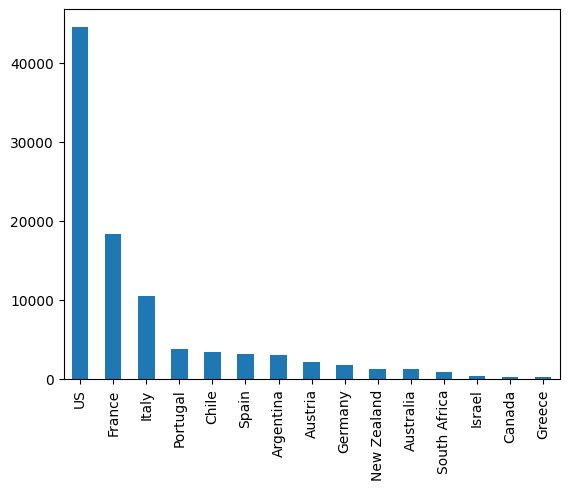

In [34]:
wine['country'].value_counts()[:15].plot(kind = 'bar')
plt.show()

([<matplotlib.patches.Wedge at 0x7fd67a616e90>,
 [Text(1.0114063502040416, 0.43250109221473626, '0'),
  Text(0.4333498067196776, 1.0110429985989806, '1'),
  Text(-0.2654192735082236, 1.0674982947294889, '2'),
  Text(-0.7936200430621437, 0.7616870927421846, '3'),
  Text(-1.0569766574774417, 0.30463149139216567, '4'),
  Text(-1.0956018056890853, -0.09826842509583675, '5'),
  Text(-1.014399381750803, -0.4254337719358781, '6'),
  Text(-0.8596904558435141, -0.6862450875099735, '7'),
  Text(-0.6789063421059807, -0.8654976479738563, '8'),
  Text(-0.49215854142489257, -0.9837580851523012, '9'),
  Text(-0.3069093161806815, -1.0563175051287879, '10'),
  Text(-0.12479378340388682, -1.09289821649765, '11'),
  Text(0.05563829742608235, -1.0985919988146313, '12'),
  Text(0.23159991807920904, -1.0753424933228035, '13'),
  Text(0.3954578314570105, -1.0264565765483307, '14'),
  Text(0.5413661350000466, -0.9575608115807118, '15'),
  Text(0.6667054093408753, -0.8749307956379271, '16'),
  Text(0.766544014

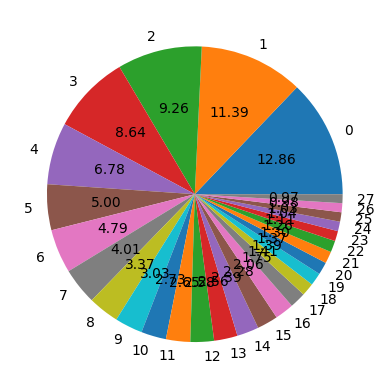

In [35]:
import matplotlib.pyplot as plt
plt.pie(wine['variety_no'].value_counts(),labels=['0','1','2','3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'],autopct="%0.2f")

In [36]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

wine['clean_text'] = wine['review_description'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# from textblob import TextBlob

# def get_sentiment(text):
#     blob = TextBlob(text)
#     sentiment = blob.sentiment.polarity
#     if sentiment > 0:
#         return 'positive'
#     elif sentiment < 0:
#         return 'negative'
#     else:
#         return 'neutral'

# wine['sentiment'] = wine['clean_text'].apply(get_sentiment)

In [38]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,variety_no,clean_text
0,@kerinokeefe,Italy,Nicosia 2013 VulkÃ Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend,0,aromas include tropical fruit broom brimstone ...
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red,1,ripe fruity wine smooth still structured firm ...
2,@paulgwineÂ,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris,2,tart snappy flavors lime flesh rind dominate g...
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling,3,pineapple rind lemon pith orange blossom start...
4,@paulgwineÂ,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir,4,much like regular bottling comes across rather...


In [39]:
# import matplotlib.pyplot as plt

# sentiment_counts = wine['sentiment'].value_counts()
# plt.bar(sentiment_counts.index, sentiment_counts.values)
# plt.show()

In [40]:
# positive_reviews = wine[wine['sentiment'] == 'positive']['clean_text']
# negative_reviews = wine[wine['sentiment'] == 'negative']['clean_text']
# neutral_reviews = wine[wine['sentiment'] == 'neutral']['clean_text']

# print('Positive reviews:\n', positive_reviews.head())
# print('Negative reviews:\n', negative_reviews.head())
# print('Negative reviews:\n', neutral_reviews.head())

[6965, 3206, 4824, 3165, 74, 1026]


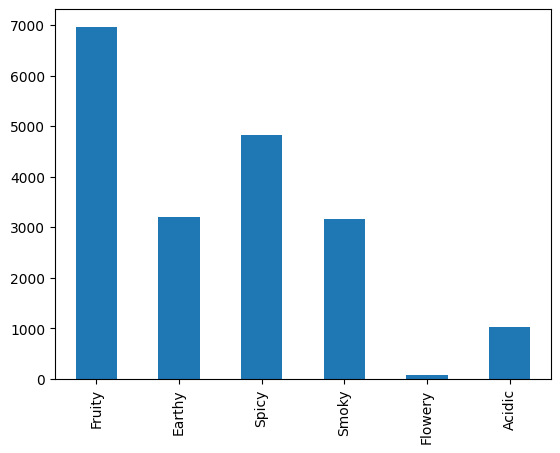

In [41]:
tastes =['Fruity','Earthy','Spicy','Smoky','Flowery','Acidic']
taste_count = []
for taste in tastes:
  num = len(wine[wine['review_description'].str.contains(taste.lower())])
  taste_count.append(num)
print(taste_count)
pd.Series(taste_count, index = tastes).plot(kind='bar')
plt.show()

In [42]:
for i in range(28):
  x = len(wine[wine['variety_no']==i])
  values = []
  values.append((i,x))
  arr = np.array(values)
  for row in arr:
    # Join the elements in the row with commas and convert to integers
    array = []
    array = [int(elem) for elem in row]
    print(array)
    # sorted_array = sorted(array, key=lambda x: int(x[1]), reverse=True)

    # print(array)

  
   




    



[0, 2179]
[1, 2282]
[2, 1324]
[3, 4773]
[4, 12278]
[5, 940]
[6, 8840]
[7, 10868]
[8, 2446]
[9, 8243]
[10, 2896]
[11, 926]
[12, 4575]
[13, 993]
[14, 2462]
[15, 1243]
[16, 1308]
[17, 6471]
[18, 3220]
[19, 2530]
[20, 1201]
[21, 3828]
[22, 2607]
[23, 1343]
[24, 1057]
[25, 1971]
[26, 980]
[27, 1671]


In [43]:
my_array = [[0, 2179], [1, 2282], [2, 1324], [3, 4773], [4, 12278], [5, 940], [6, 8840], [7, 10868], [8, 2446], [9, 8243], [10, 2896], [11, 926], [12, 4575], [13, 993], [14, 2462], [15, 1243], [16, 1308], [17, 6471], [18, 3220], [19, 2530], [20, 1201], [21, 3828], [22, 2607], [23, 1343], [24, 1057], [25, 1971], [26, 980], [27, 1671]]

sorted_array = sorted(my_array, key=lambda x: x[1], reverse=True)

print(sorted_array)


[[4, 12278], [7, 10868], [6, 8840], [9, 8243], [17, 6471], [3, 4773], [12, 4575], [21, 3828], [18, 3220], [10, 2896], [22, 2607], [19, 2530], [14, 2462], [8, 2446], [1, 2282], [0, 2179], [25, 1971], [27, 1671], [23, 1343], [2, 1324], [16, 1308], [15, 1243], [20, 1201], [24, 1057], [13, 993], [26, 980], [5, 940], [11, 926]]


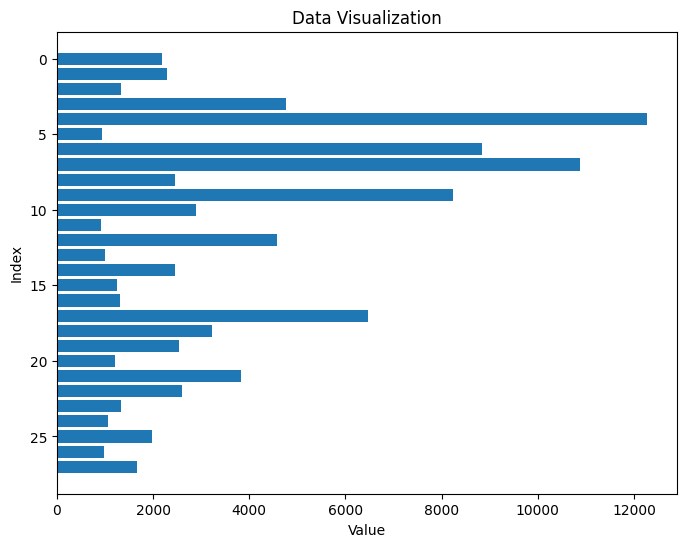

In [44]:
import matplotlib.pyplot as plt

my_array = [[0, 2179], [1, 2282], [2, 1324], [3, 4773], [4, 12278], [5, 940], [6, 8840], [7, 10868], [8, 2446], [9, 8243], [10, 2896], [11, 926], [12, 4575], [13, 993], [14, 2462], [15, 1243], [16, 1308], [17, 6471], [18, 3220], [19, 2530], [20, 1201], [21, 3828], [22, 2607], [23, 1343], [24, 1057], [25, 1971], [26, 980], [27, 1671]]

# extract x and y values from the 2D array
x_values = [elem[1] for elem in my_array]
y_values = [elem[0] for elem in my_array]

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(y_values, x_values)

# set the axis labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Index')
ax.set_title('Data Visualization')

# invert the y-axis to show the highest value at the top
ax.invert_yaxis()

# display the plot
plt.show()


In [45]:
wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,variety_no,clean_text
0,@kerinokeefe,Italy,Nicosia 2013 VulkÃ Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend,0,aromas include tropical fruit broom brimstone ...
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red,1,ripe fruity wine smooth still structured firm ...
2,@paulgwineÂ,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris,2,tart snappy flavors lime flesh rind dominate g...
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling,3,pineapple rind lemon pith orange blossom start...
4,@paulgwineÂ,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir,4,much like regular bottling comes across rather...


In [46]:
# movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

wine1 = wine[['variety','country','winery','variety_no','points','price','winery','review_description']]

In [47]:
wine1['feature'] = wine['review_title'] + ['review_description'] + ['variety'] + ['country'] + ['winery']

<ipython-input-47-ac8e121b6ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine1['feature'] = wine['review_title'] + ['review_description'] + ['variety'] + ['country'] + ['winery']


In [48]:
wine1.head()

,variety,country,winery,variety_no,points,price,winery,review_description,feature
0,White Blend,Italy,Nicosia,0,87,NaN,Nicosia,"Aromas include tropical fruit, broom, brimston...",Nicosia 2013 VulkÃ Bianco (Etna)review_descr...
1,Portuguese Red,Portugal,Quinta dos Avidagos,1,87,15.0,Quinta dos Avidagos,"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos 2011 Avidagos Red (Douro)r...
2,Pinot Gris,US,Rainstorm,2,87,14.0,Rainstorm,"Tart and snappy, the flavors of lime flesh and...",Rainstorm 2013 Pinot Gris (Willamette Valley)r...
3,Riesling,US,St. Julian,3,87,13.0,St. Julian,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...
4,Pinot Noir,US,Sweet Cheeks,4,87,65.0,Sweet Cheeks,"Much like the regular bottling from 2012, this...",Sweet Cheeks 2012 Vintner's Reserve Wild Child...


In [49]:
# X = wine1[["price", "country", "winery", "points"]]
# y = wine1["variety"]

In [50]:
# X = pd.get_dummies(X)

In [51]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# from sklearn.linear_model import LinearRegression

In [53]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [54]:
# y_pred = model.predict(X_test)

In [55]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_features=5000,stop_words='english')

In [57]:
vectors = CV.fit_transform(wine1['review_description']).toarray()

In [58]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import nltk
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [61]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return  " ".join(y)

In [62]:
wine1['review_description'].apply(stem)

0         aroma includ tropic fruit, broom, brimston and...
1         thi is ripe and fruity, a wine that is smooth ...
2         tart and snappy, the flavor of lime flesh and ...
3         pineappl rind, lemon pith and orang blossom st...
4         much like the regular bottl from 2012, thi com...
                                ...                        
103317    note of honeysuckl and cantaloup sweeten thi d...
103318    citat is given as much as a decad of bottl age...
103319    well-drain gravel soil give thi wine it crisp ...
103320    a dri style of pinot gris, thi is crisp with s...
103321    big, rich and off-dry, thi is power by intens ...
Name: review_description, Length: 95455, dtype: object

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
similarity

In [ ]:
def recommend(wine):
  wine_index =  wine1[wine1['title'] == wine].index[0]
  distances = similarity[wine_index]
  movies_list = sorted(list(enumerate(distances)) , reverse = True , key=lambda x:x[1])[1:6]

  for i in movies_list:
    print(wine1.iloc[i[0]].title)
  

In [ ]:
sorted(list(enumerate(similarity[0])) , reverse = True , key=lambda x:x[1])[1:6]